<a href="https://colab.research.google.com/github/marcus2348532/2348532_lab7/blob/main/2348532_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('/content/employee_data (1) 2.csv')

In [3]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


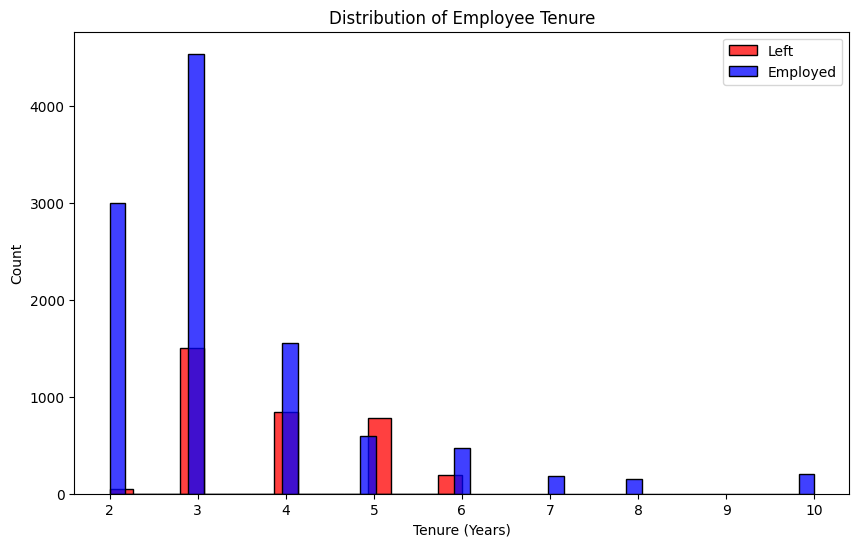

In [5]:
left_employees = df[df['status'] == 'Left']
current_employees = df[df['status'] == 'Employed']

plt.figure(figsize=(10, 6))
sns.histplot(left_employees['tenure'], color='red', label='Left')
sns.histplot(current_employees['tenure'], color='blue', label='Employed')

plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Employee Tenure')
plt.legend()

plt.show()

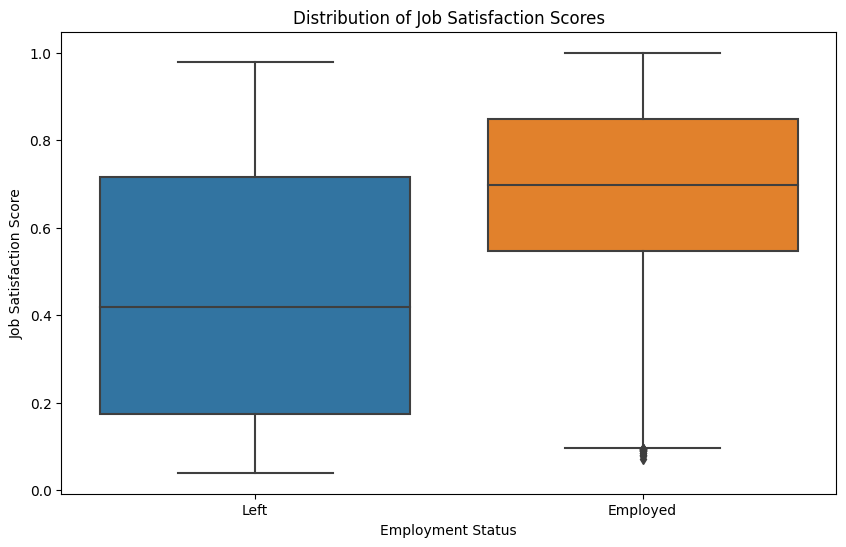

In [6]:
left_employees = df[df['status'] == 'Left']
current_employees = df[df['status'] == 'Employed']

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction', data=pd.concat([left_employees, current_employees]))

plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores')
plt.show()

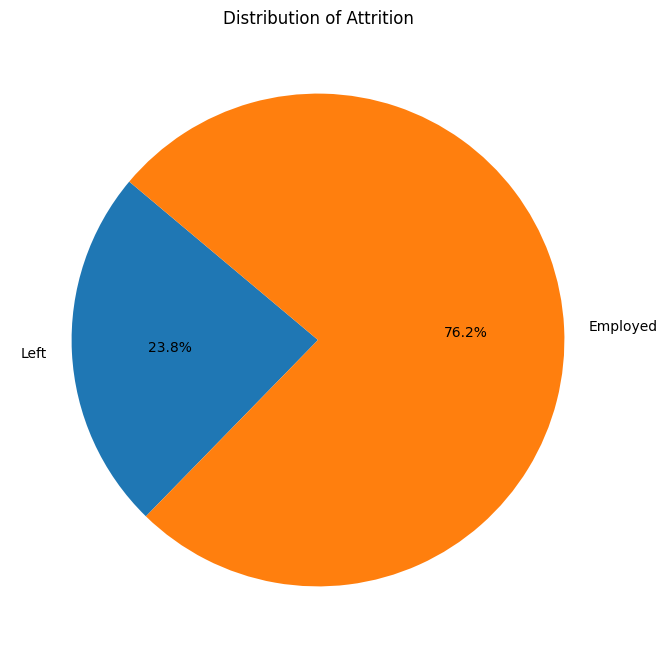

Percentage of employees who have left: 23.8%


In [7]:
# Getting the length of left employees and working employees

left_count = len(df[df['status'] == 'Left'])
employed_count = len(df[df['status'] == 'Employed'])

attrition_data = [left_count, employed_count]
attrition_labels = ['Left', 'Employed']

plt.figure(figsize=(8, 8))
plt.pie(attrition_data, labels=attrition_labels, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Attrition')

plt.show()

attrition_percentage = (left_count / (left_count + employed_count)) * 100
print(f"Percentage of employees who have left: {attrition_percentage:.1f}%")

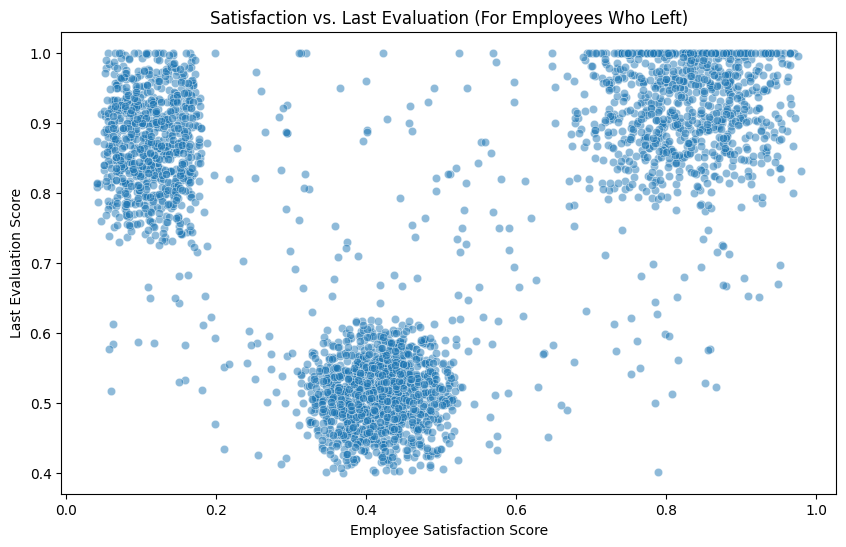

Correlation coefficient for employees who left: 0.18


In [8]:
left_employees = df[df['status'] == 'Left']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees, alpha=0.5)

plt.xlabel('Employee Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Satisfaction vs. Last Evaluation (For Employees Who Left)')

plt.show()

# Calculating the correlation coefficient
correlation = left_employees['satisfaction'].corr(left_employees['last_evaluation'])
print(f"Correlation coefficient for employees who left: {correlation:.2f}")

In [9]:
# Example of imputing missing values for numeric columns with pandas
df['last_evaluation'].fillna(df['last_evaluation'].median(), inplace=True)
df['satisfaction'].fillna(df['satisfaction'].mean(), inplace=True)
df['tenure'].fillna(df['tenure'].median(), inplace=True)

In [10]:
# Example of imputing missing values for categorical columns
df['department'].fillna('Unknown', inplace=True)
df['filed_complaint'].fillna(0, inplace=True)  # Assuming 0 indicates no complaint
df['recently_promoted'].fillna(0, inplace=True)  # Assuming 0 indicates no recent promotion

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         14249 non-null  object 
 2   filed_complaint    14249 non-null  float64
 3   last_evaluation    14249 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  14249 non-null  float64
 6   salary             14249 non-null  object 
 7   satisfaction       14249 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14249 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [12]:
df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

In [13]:
# Label encoding using scikit-learn (for 'status' column)
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

In [14]:
selected_features = ['tenure','satisfaction','n_projects']

In [15]:
X = df[selected_features]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 'random_state' ensures reproducibility

In [16]:
tree_classifier_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the models to the training data
tree_classifier_gini.fit(X_train, y_train)
tree_classifier_entropy.fit(X_train, y_train)

# Make predictions on the test data for both models
y_pred_gini = tree_classifier_gini.predict(X_test)
y_pred_entropy = tree_classifier_entropy.predict(X_test)

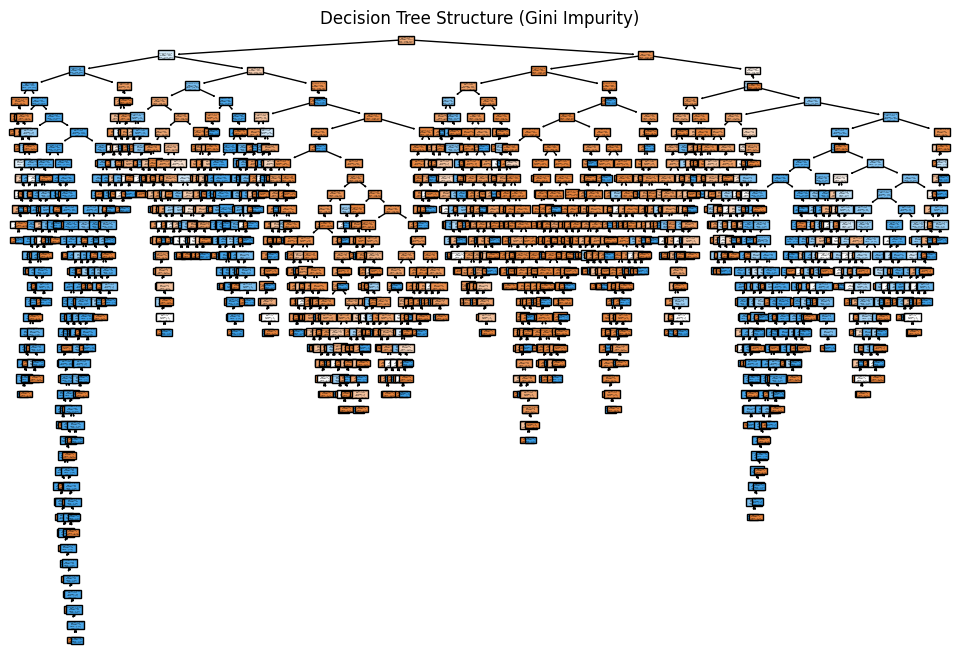

In [18]:
# Visualize the Decision Tree structure for Gini impurity
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier_gini, filled=True, feature_names=X.columns, class_names=['Employed', 'Left'])
plt.title("Decision Tree Structure (Gini Impurity)")
plt.show()

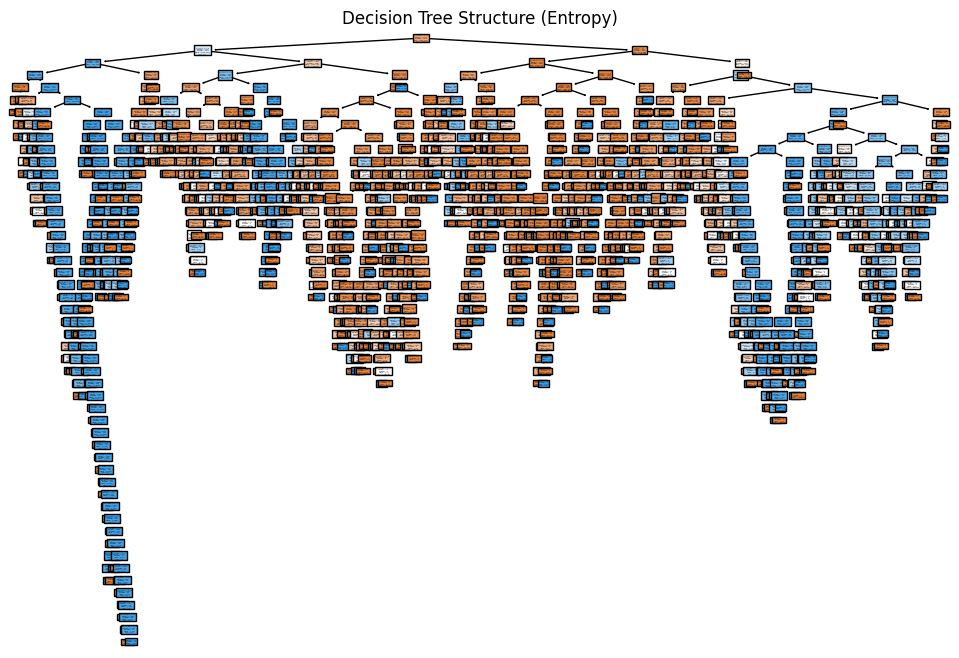

In [19]:
# Visualize the Decision Tree structure for Entropy
plt.figure(figsize=(12, 8))
plot_tree(tree_classifier_entropy, filled=True, feature_names=X.columns, class_names=['Employed', 'Left'])
plt.title("Decision Tree Structure (Entropy)")
plt.show()

#Most influential features for predicting attrition


In [20]:
# Feature importances for Gini impurity tree
gini_feature_importance = tree_classifier_gini.feature_importances_

# Feature importances for Entropy tree
entropy_feature_importance = tree_classifier_entropy.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Gini Impurity Importance': gini_feature_importance, 'Entropy Importance': entropy_feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Gini Impurity Importance', ascending=False)

print('Feature Importances :  \n', feature_importance_df)


Feature Importances :  
         Feature  Gini Impurity Importance  Entropy Importance
1  satisfaction                  0.587875            0.571264
0        tenure                  0.225984            0.260499
2    n_projects                  0.186141            0.168237


Findings :
Based on these feature importances, it appears that Satisfaction is the most influential feature for predicting attrition, regarding of whether Gini Impurity or Entropy is used as a split criterion. Tenure is the second most important feature, and No of Projects is the least important feature among the selected features.

Applying post-pruning techniques to control the comple

In [21]:
max_depths = [None, 5, 10, 15, 20]

# Initializing variables to store the best depth and highest accuracy
best_max_depth = None
best_accuracy = 0

# Iterate over different maximum depths and find the best one
for max_depth in max_depths:
    tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    tree_classifier.fit(X_train, y_train)

    # Making predictions on the test data
    y_pred = tree_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this depth resulted in a higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

print(f'Best Maximum Depth: {best_max_depth}')

Best Maximum Depth: 10


In [22]:
# Create and fit the pruned Decision Tree classifiers
tree_classifier_gini_pruned = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth, random_state=42)
tree_classifier_entropy_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, random_state=42)

tree_classifier_gini_pruned.fit(X_train, y_train)
tree_classifier_entropy_pruned.fit(X_train, y_train)

# Make predictions on the test data for both pruned models
y_pred_gini_pruned = tree_classifier_gini_pruned.predict(X_test)
y_pred_entropy_pruned = tree_classifier_entropy_pruned.predict(X_test)

# Evaluate the pruned models using appropriate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Evaluation for {model_name}:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print()

evaluate_model(y_test, y_pred_gini_pruned, 'Gini Impurity Pruned Model')
evaluate_model(y_test, y_pred_entropy_pruned, 'Entropy Pruned Model')

Evaluation for Gini Impurity Pruned Model:
Accuracy: 0.96
Precision: 0.90
Recall: 0.90
F1-score: 0.90

Evaluation for Entropy Pruned Model:
Accuracy: 0.96
Precision: 0.90
Recall: 0.91
F1-score: 0.90



**Findings:** Both pruned models, whether using gini impurity or entropy as the split criterion perform quite well in predicting employee attrition. They have high accuracy and balanced precision and recall scores, indicating a good balance between identifying true positives and avoiding false positives.

A Diverging bar chart to display the confusion matrix, showing true positives, true negatives, false positives, and false negatives for both criteria.

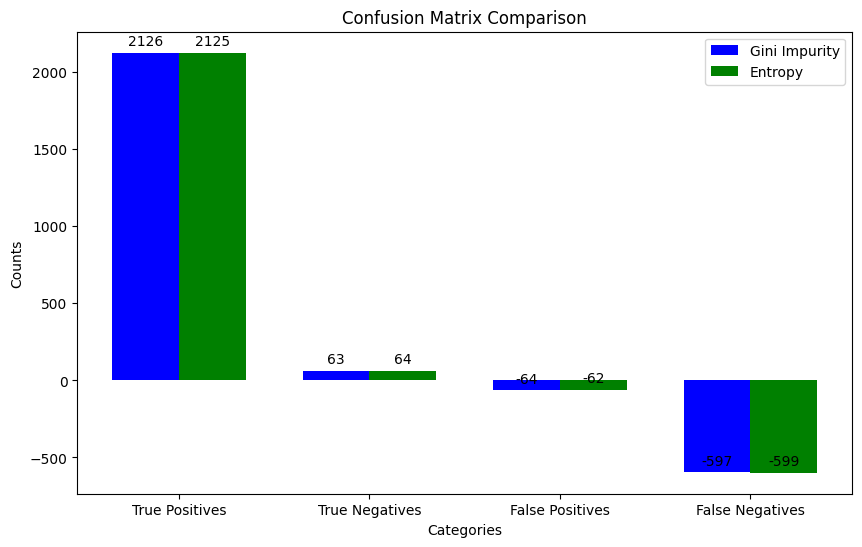

In [23]:
# Confusion matrix results
confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini_pruned)
confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy_pruned)

# Extract TP,TN,FP,FN
tp_gini, tn_gini, fp_gini, fn_gini = confusion_matrix_gini.ravel()
tp_entropy, tn_entropy, fp_entropy, fn_entropy = confusion_matrix_entropy.ravel()

# Create a diverging bar chart
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values_gini = [tp_gini, tn_gini, -fp_gini, -fn_gini]  # Negative values for false positives/negatives
values_entropy = [tp_entropy, tn_entropy, -fp_entropy, -fn_entropy]  # Negative values for false positives/negatives

bar_width = 0.35
index = np.arange(len(categories))

bar1 = ax.bar(index - bar_width / 2, values_gini, bar_width, label='Gini Impurity', color='b')
bar2 = ax.bar(index + bar_width / 2, values_entropy, bar_width, label='Entropy', color='g')

ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Confusion Matrix Comparison')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

# Add labels to the bars
for bar in [bar1, bar2]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

Bar chart to visualize the importance of each feature in the pruned decision tree model for both Gini impurity and entropy criteria. Which features are most crucial for predicting attrition under each criterion.

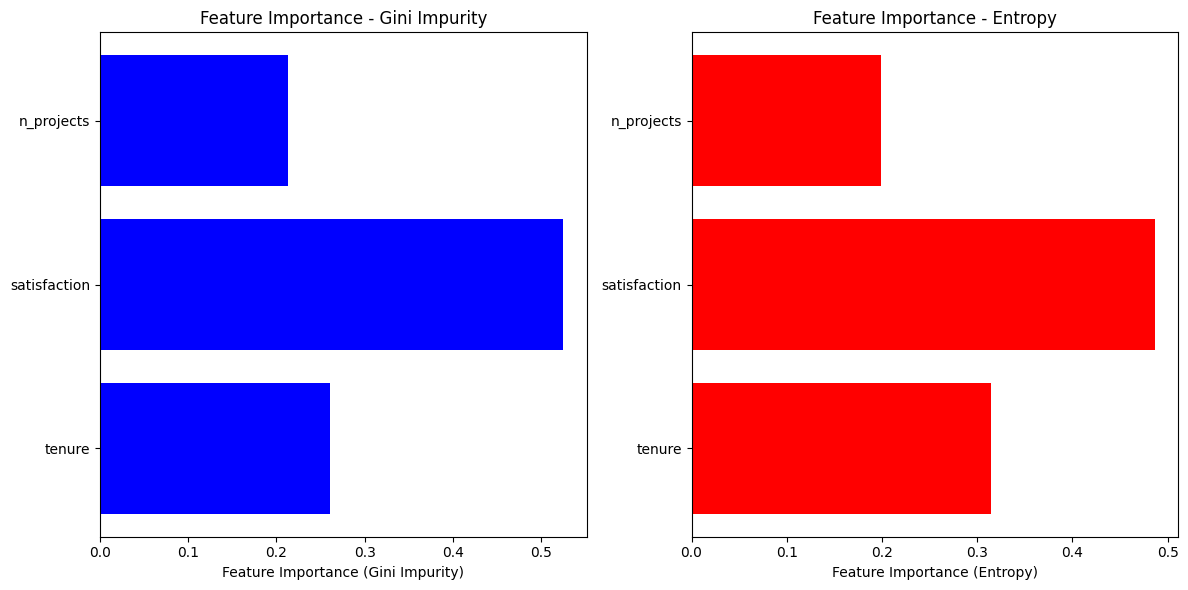

In [24]:
# Extracting feature importances for Gini Impurity and Entropy models
feature_importance_gini = tree_classifier_gini_pruned.feature_importances_
feature_importance_entropy = tree_classifier_entropy_pruned.feature_importances_

feature_names = X.columns

# Create subplots for Gini Impurity and Entropy
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].barh(feature_names, feature_importance_gini, color='b')
axes[0].set_xlabel('Feature Importance (Gini Impurity)')
axes[0].set_title('Feature Importance - Gini Impurity')

axes[1].barh(feature_names, feature_importance_entropy, color='r')
axes[1].set_xlabel('Feature Importance (Entropy)')
axes[1].set_title('Feature Importance - Entropy')

plt.tight_layout()
plt.show()


Findings: "Satisfaction" feature plays a significance role in both the criterion in order to predict the attrition. This suggests that employee satisfaction is a crucial factor in determining whether an employee is likely to leave or stay with the company according to the pruned decision tree models.

Understanding the importance of this feature can help the organizations focus on improving employee satisfaction as a potential strategy to reduce attrition.